### Phase 1: Setting Up the Environment and Dataset

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

In [4]:
# Load the processed dataset
data_path = "data/dynamic_pricing.csv"

In [5]:
# Load the data
data = pd.read_csv(data_path)

In [6]:
# Display the first few rows
print(data.head())

   Number_of_Riders  Number_of_Drivers Location_Category  \
0                90                 45             Urban   
1                58                 39          Suburban   
2                42                 31             Rural   
3                89                 28             Rural   
4                78                 22             Rural   

  Customer_Loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
0                  Silver                    13             4.47   
1                  Silver                    72             4.06   
2                  Silver                     0             3.99   
3                 Regular                    67             4.31   
4                 Regular                    74             3.77   

  Time_of_Booking Vehicle_Type  Expected_Ride_Duration  \
0           Night      Premium                      90   
1         Evening      Economy                      43   
2       Afternoon      Premium                      76  

In [7]:
print("Data Missing Values:\n", data.isnull().sum())

Data Missing Values:
 Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64


In [8]:
print("Data Types:\n", data.dtypes)

Data Types:
 Number_of_Riders             int64
Number_of_Drivers            int64
Location_Category           object
Customer_Loyalty_Status     object
Number_of_Past_Rides         int64
Average_Ratings            float64
Time_of_Booking             object
Vehicle_Type                object
Expected_Ride_Duration       int64
Historical_Cost_of_Ride    float64
dtype: object


In [9]:
print(data.describe())

       Number_of_Riders  Number_of_Drivers  Number_of_Past_Rides  \
count       1000.000000        1000.000000           1000.000000   
mean          60.372000          27.076000             50.031000   
std           23.701506          19.068346             29.313774   
min           20.000000           5.000000              0.000000   
25%           40.000000          11.000000             25.000000   
50%           60.000000          22.000000             51.000000   
75%           81.000000          38.000000             75.000000   
max          100.000000          89.000000            100.000000   

       Average_Ratings  Expected_Ride_Duration  Historical_Cost_of_Ride  
count      1000.000000              1000.00000              1000.000000  
mean          4.257220                99.58800               372.502623  
std           0.435781                49.16545               187.158756  
min           3.500000                10.00000                25.993449  
25%           3.8

In [10]:
weather_data = data.drop(columns=['column_to_remove_1', 'column_to_remove_2'], errors='ignore')

In [11]:
data

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422
...,...,...,...,...,...,...,...,...,...,...
995,33,23,Urban,Gold,24,4.21,Morning,Premium,11,91.389526
996,84,29,Urban,Regular,92,4.55,Morning,Premium,94,424.155987
997,44,6,Suburban,Gold,80,4.13,Night,Premium,40,157.364830
998,53,27,Suburban,Regular,78,3.63,Night,Premium,58,279.095048


### Phase 2: Exploratory Data Analysis (EDA)

In [12]:
print("Shape of the dataset:", data.shape)

Shape of the dataset: (1000, 10)


In [13]:
print(data.head())

   Number_of_Riders  Number_of_Drivers Location_Category  \
0                90                 45             Urban   
1                58                 39          Suburban   
2                42                 31             Rural   
3                89                 28             Rural   
4                78                 22             Rural   

  Customer_Loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
0                  Silver                    13             4.47   
1                  Silver                    72             4.06   
2                  Silver                     0             3.99   
3                 Regular                    67             4.31   
4                 Regular                    74             3.77   

  Time_of_Booking Vehicle_Type  Expected_Ride_Duration  \
0           Night      Premium                      90   
1         Evening      Economy                      43   
2       Afternoon      Premium                      76  

In [14]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB
None


In [15]:
# Convert all column names to lowercase and replace spaces with underscores
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')

In [16]:
# Replace special characters in column names
data.columns = data.columns.str.replace(r'[^\w\s]', '', regex=True)

In [17]:
# Display updated column names
print(data.columns)

Index(['number_of_riders', 'number_of_drivers', 'location_category',
       'customer_loyalty_status', 'number_of_past_rides', 'average_ratings',
       'time_of_booking', 'vehicle_type', 'expected_ride_duration',
       'historical_cost_of_ride'],
      dtype='object')


In [18]:
data

,number_of_riders,number_of_drivers,location_category,customer_loyalty_status,number_of_past_rides,average_ratings,time_of_booking,vehicle_type,expected_ride_duration,historical_cost_of_ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422
...,...,...,...,...,...,...,...,...,...,...
995,33,23,Urban,Gold,24,4.21,Morning,Premium,11,91.389526
996,84,29,Urban,Regular,92,4.55,Morning,Premium,94,424.155987
997,44,6,Suburban,Gold,80,4.13,Night,Premium,40,157.364830
998,53,27,Suburban,Regular,78,3.63,Night,Premium,58,279.095048


In [19]:
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 number_of_riders           0
number_of_drivers          0
location_category          0
customer_loyalty_status    0
number_of_past_rides       0
average_ratings            0
time_of_booking            0
vehicle_type               0
expected_ride_duration     0
historical_cost_of_ride    0
dtype: int64


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Analyze the Target Variable

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

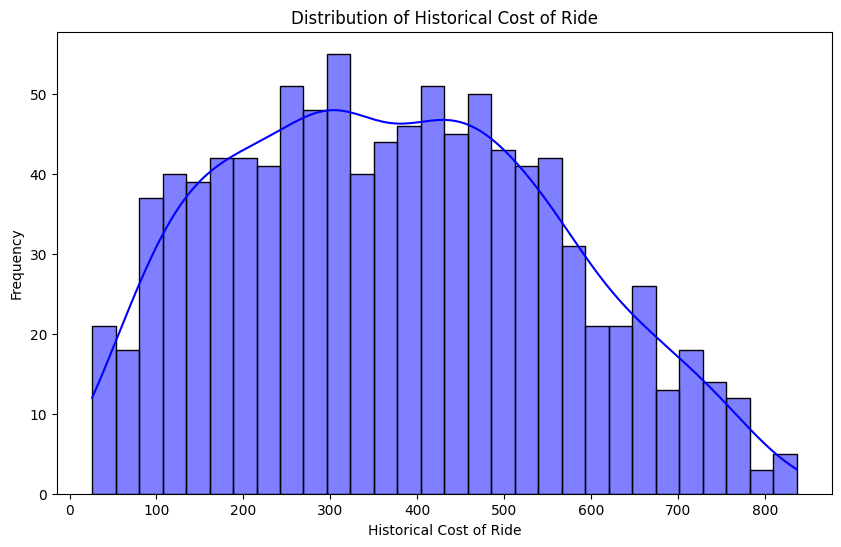

In [22]:
# Distribution plot for the target variable
plt.figure(figsize=(10, 6))
sns.histplot(data['historical_cost_of_ride'], kde=True, bins=30, color='blue')
plt.title('Distribution of Historical Cost of Ride')
plt.xlabel('Historical Cost of Ride')
plt.ylabel('Frequency')
plt.show()

#### Analyze Numerical Features

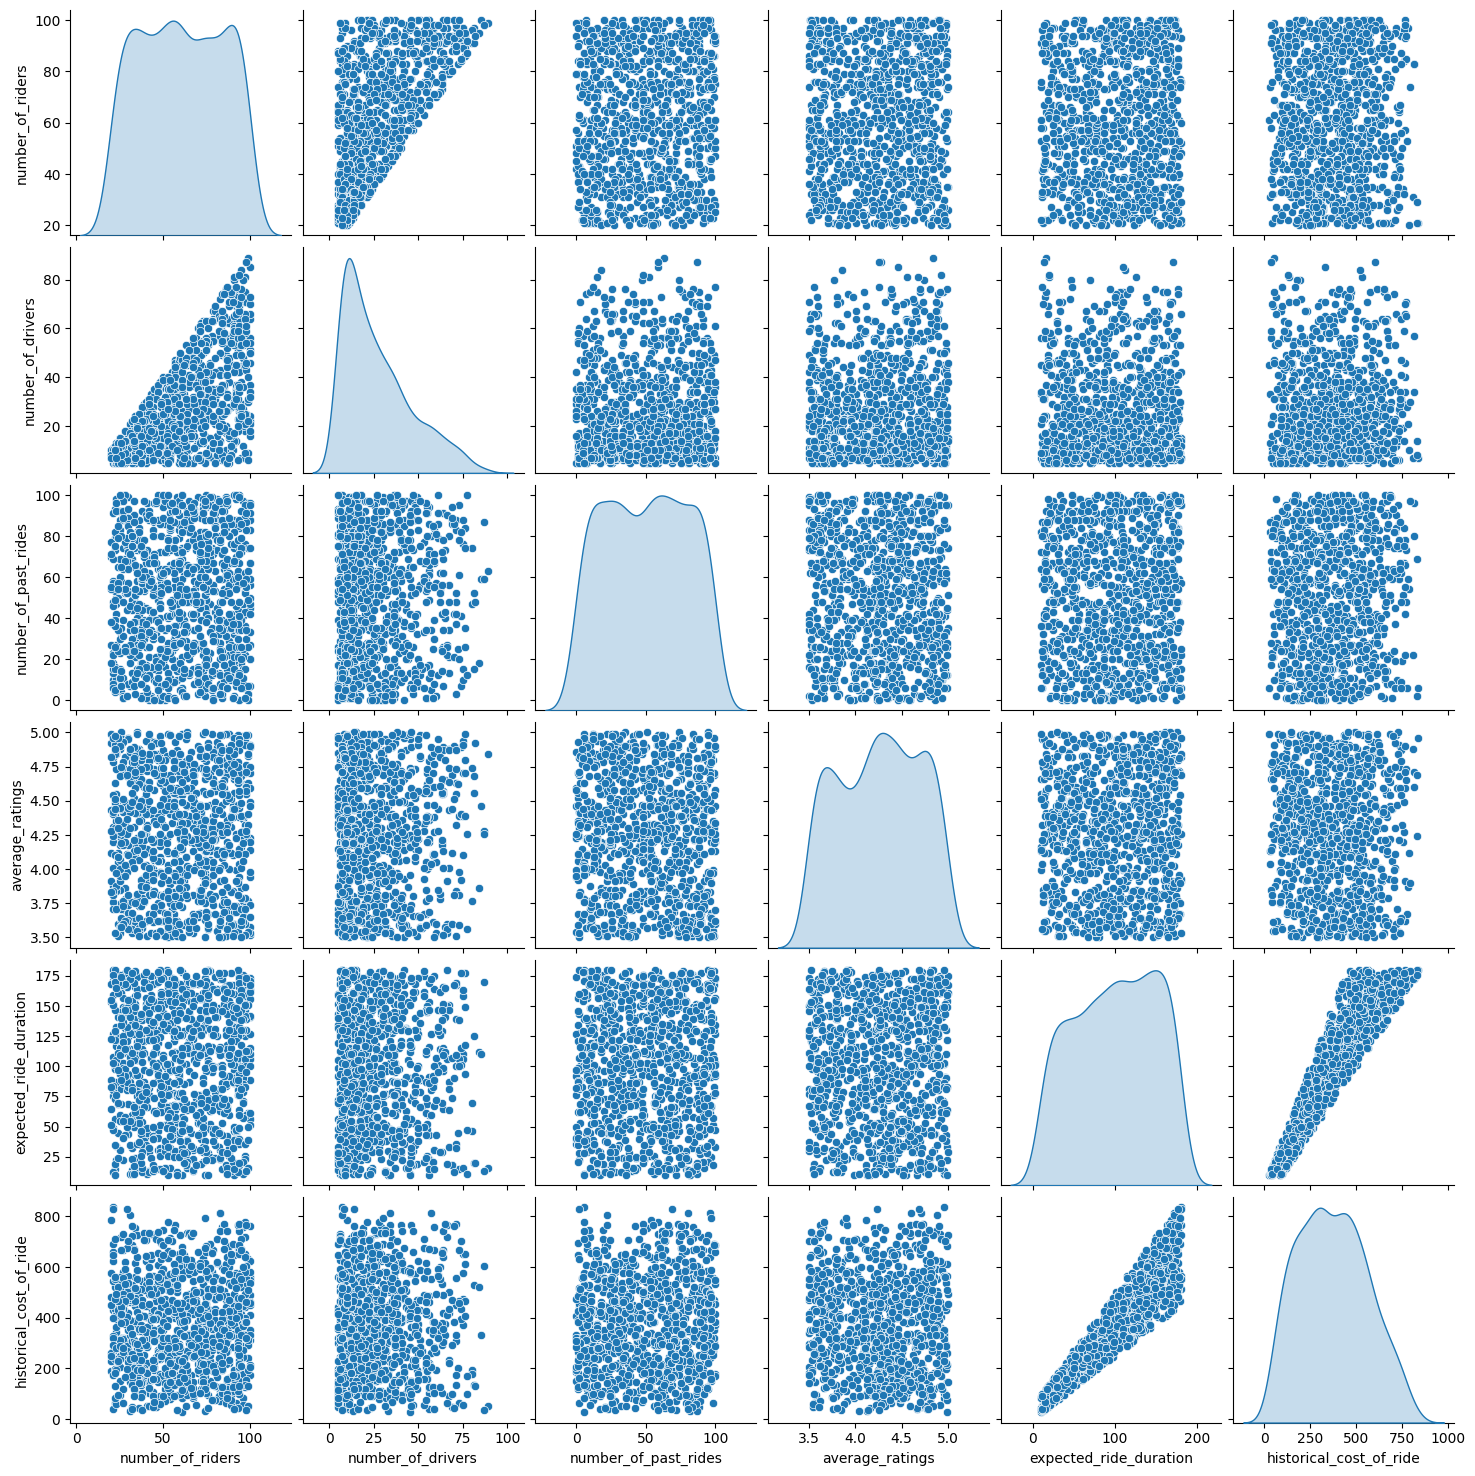

In [23]:
# Pairplot for numerical features and target variable
numerical_features = ['number_of_riders', 'number_of_drivers', 'number_of_past_rides', 
                      'average_ratings', 'expected_ride_duration', 'historical_cost_of_ride']

sns.pairplot(data[numerical_features], diag_kind='kde', height=2.5)
plt.show()

#### Correlation Analysis

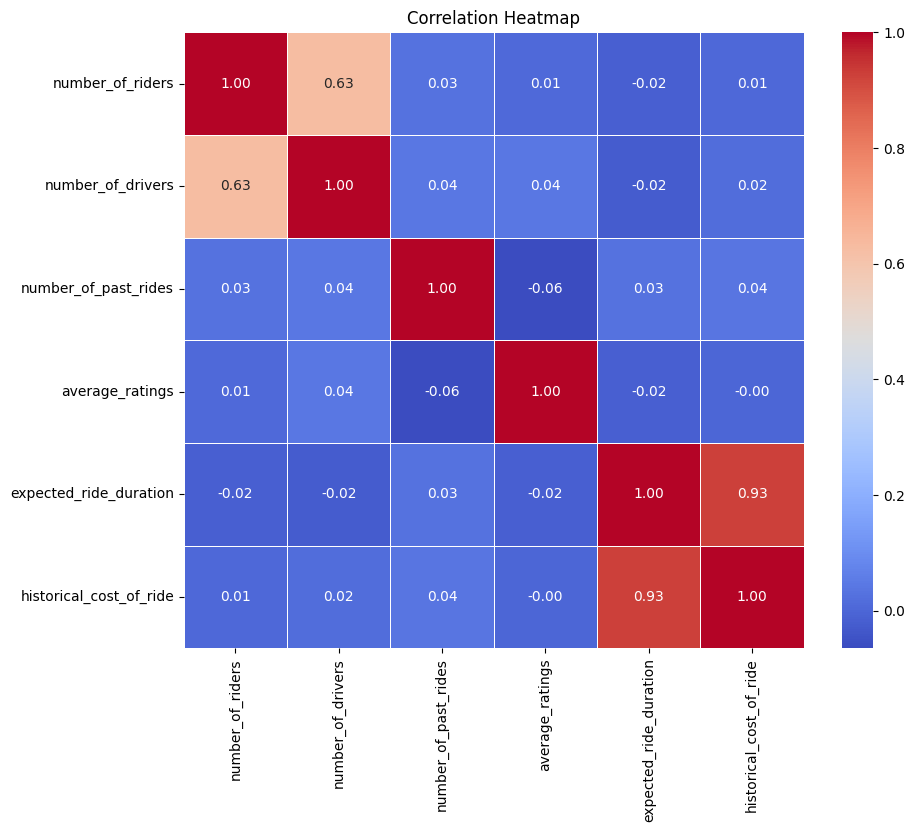

In [24]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


#### Analyze Categorical Features

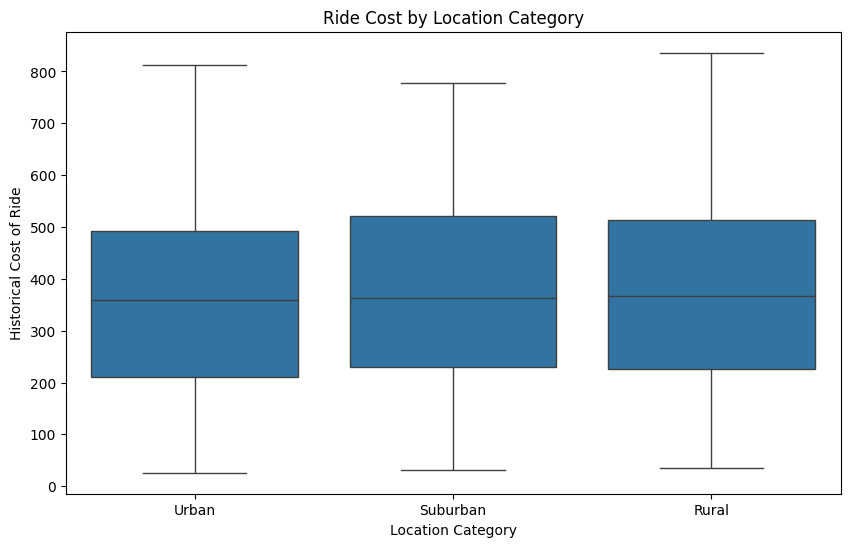

In [25]:
# Boxplot for Location_Category and Historical_Cost_of_Ride
plt.figure(figsize=(10, 6))
sns.boxplot(x='location_category', y='historical_cost_of_ride', data=data)
plt.title('Ride Cost by Location Category')
plt.xlabel('Location Category')
plt.ylabel('Historical Cost of Ride')
plt.show()

C:\Users\a_farnoo\AppData\Local\Temp\ipykernel_22056\3969087940.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='vehicle_type', y='historical_cost_of_ride', data=data, ci=None)


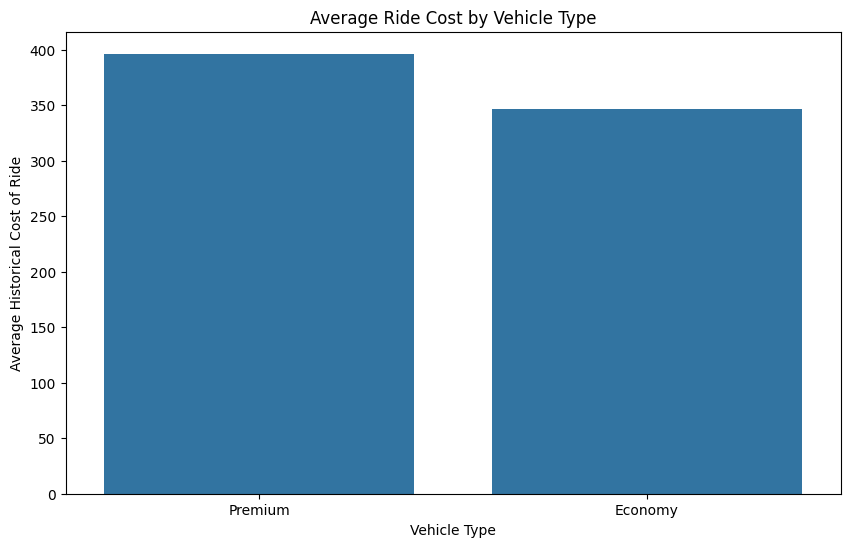

In [26]:
# Bar plot for Vehicle_Type and Historical_Cost_of_Ride
plt.figure(figsize=(10, 6))
sns.barplot(x='vehicle_type', y='historical_cost_of_ride', data=data, ci=None)
plt.title('Average Ride Cost by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Historical Cost of Ride')
plt.show()

#### Time-Based Analysis

C:\Users\a_farnoo\AppData\Local\Temp\ipykernel_22056\1780384889.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='time_of_booking', y='historical_cost_of_ride', data=data, ci=None, palette='viridis')
C:\Users\a_farnoo\AppData\Local\Temp\ipykernel_22056\1780384889.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='time_of_booking', y='historical_cost_of_ride', data=data, ci=None, palette='viridis')


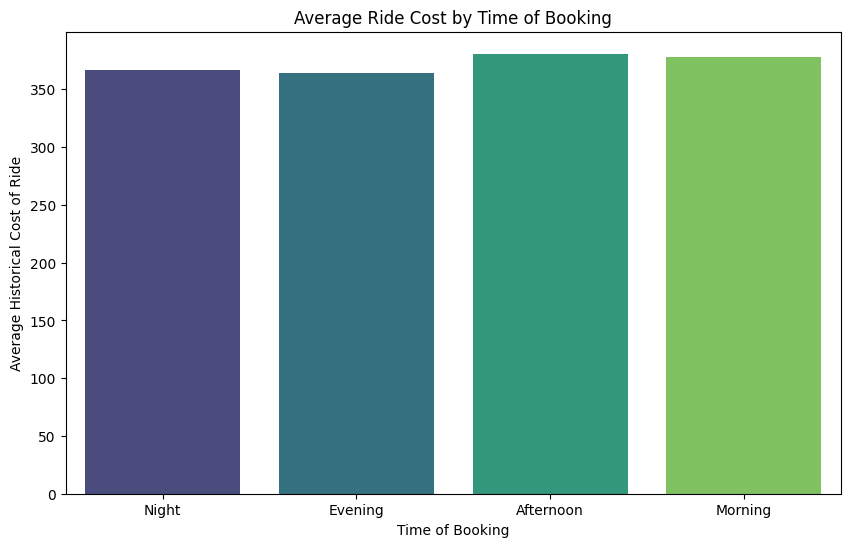

In [27]:
# Bar plot for Time_of_Booking and Historical_Cost_of_Ride
plt.figure(figsize=(10, 6))
sns.barplot(x='time_of_booking', y='historical_cost_of_ride', data=data, ci=None, palette='viridis')
plt.title('Average Ride Cost by Time of Booking')
plt.xlabel('Time of Booking')
plt.ylabel('Average Historical Cost of Ride')
plt.show()


#### Outlier Detection

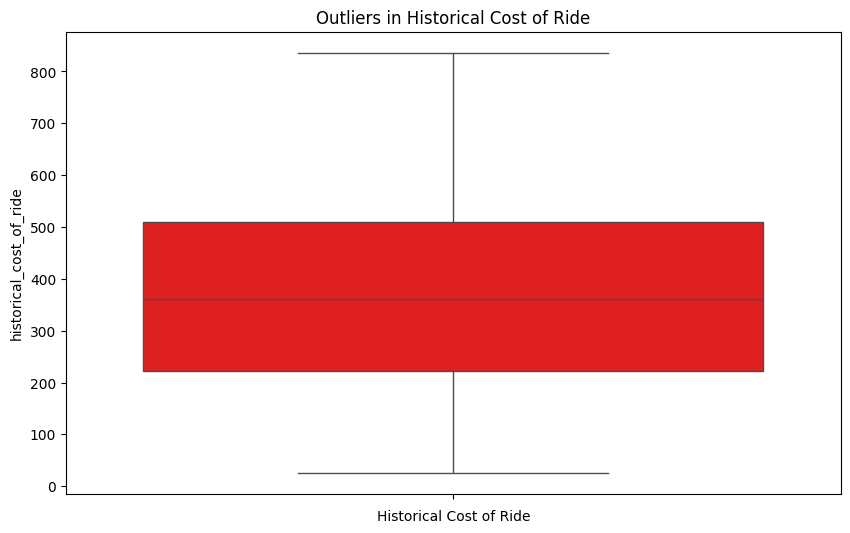

In [28]:
# Boxplot for detecting outliers in the target variable
plt.figure(figsize=(10, 6))
sns.boxplot(data['historical_cost_of_ride'], color='red')
plt.title('Outliers in Historical Cost of Ride')
plt.xlabel('Historical Cost of Ride')
plt.show()

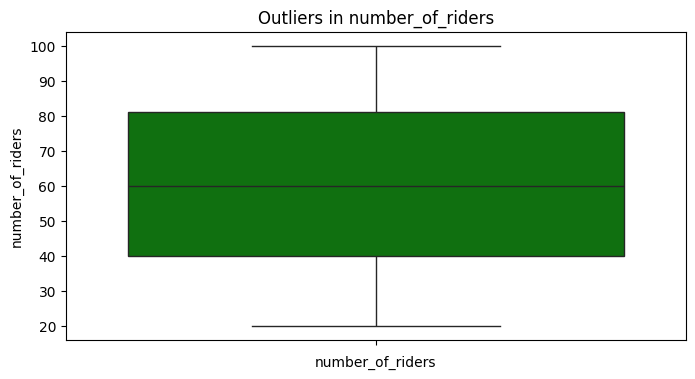

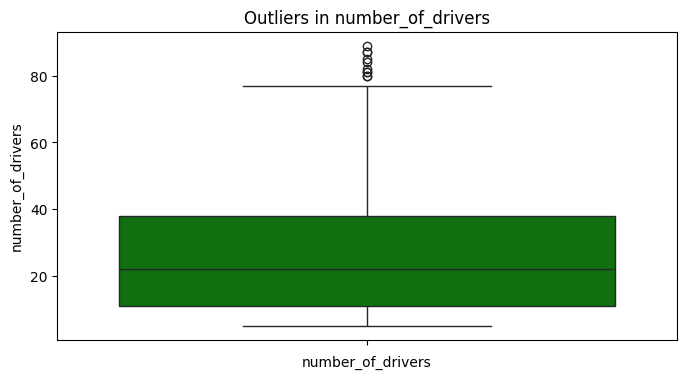

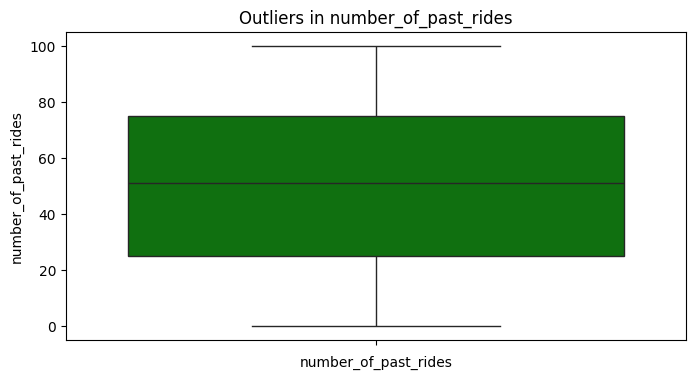

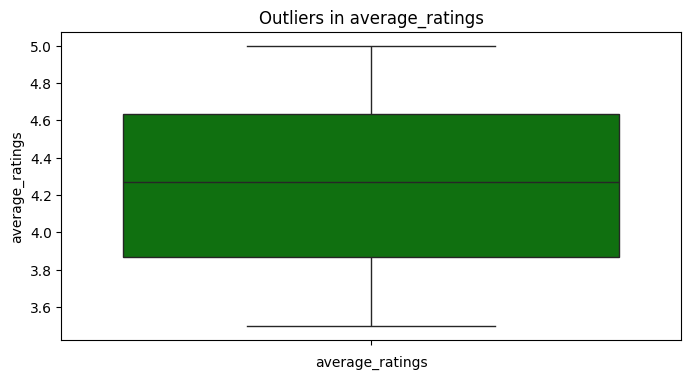

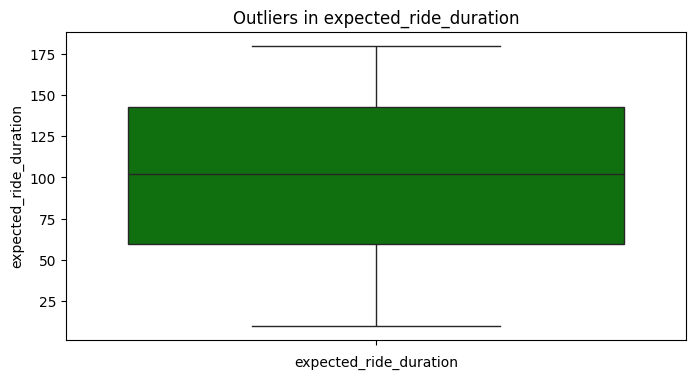

In [29]:
# Outlier detection for other numerical features
for feature in numerical_features[:-1]:  # Exclude target variable
    plt.figure(figsize=(8, 4))
    sns.boxplot(data[feature], color='green')
    plt.title(f'Outliers in {feature}')
    plt.xlabel(feature)
    plt.show()

#### Demand-Supply Ratio (Feature Engineering)

In [30]:
# Create Demand-Supply Ratio
data['demand_supply_ratio'] = data['number_of_riders'] / data['number_of_drivers']

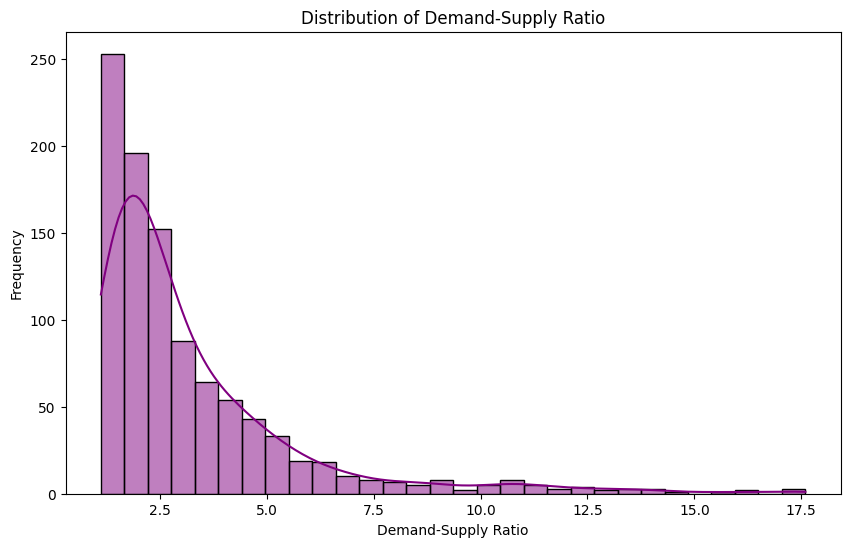

In [31]:
# Distribution plot for Demand-Supply Ratio
plt.figure(figsize=(10, 6))
sns.histplot(data['demand_supply_ratio'], kde=True, bins=30, color='purple')
plt.title('Distribution of Demand-Supply Ratio')
plt.xlabel('Demand-Supply Ratio')
plt.ylabel('Frequency')
plt.show()

In [32]:
# Correlation with the target variable
print("Correlation with Historical Cost of Ride:")
print(data[['demand_supply_ratio', 'historical_cost_of_ride']].corr())

Correlation with Historical Cost of Ride:
                         demand_supply_ratio  historical_cost_of_ride
demand_supply_ratio                 1.000000                -0.094372
historical_cost_of_ride            -0.094372                 1.000000


### Findings

#### Key Insights from EDA:

1. **Target Variable (`Historical_Cost_of_Ride`)**:
   - The distribution of ride costs is slightly **right-skewed**, indicating the presence of high-cost rides.
   - Outliers are observed in the higher range of ride costs, which may need to be addressed during preprocessing.

2. **Numerical Features**:
   - `Expected_Ride_Duration` shows a strong positive correlation with `Historical_Cost_of_Ride`, indicating that longer rides generally cost more.
   - Features like `Number_of_Riders` and `Number_of_Drivers` have moderate correlations with the target variable.
   - The **pair plot** highlights some linear relationships between numerical features and the target variable.

3. **Categorical Features**:
   - **Location Category**: Urban areas tend to have higher ride costs compared to rural and suburban areas.
   - **Vehicle Type**: Premium vehicles are associated with significantly higher ride costs compared to Economy vehicles.
   - **Time of Booking**: Rides booked at night are generally more expensive, indicating potential demand-supply imbalances.

4. **Demand-Supply Ratio**:
   - A new feature (`Demand-Supply Ratio`) was created, representing the ratio of `Number_of_Riders` to `Number_of_Drivers`.
   - Higher demand-supply ratios are moderately correlated with higher ride costs, supporting the need for dynamic pricing strategies.

5. **Outliers**:
   - Significant outliers are observed in the target variable and some numerical features (e.g., `Expected_Ride_Duration`). These may represent exceptional scenarios or errors and should be addressed in preprocessing.

#### Visualizations:
- Distribution of ride costs and numerical features was analyzed using histograms and scatter plots.
- Box plots and bar plots revealed the influence of categorical variables like `Location_Category`, `Vehicle_Type`, and `Time_of_Booking`.
- A **correlation heatmap** provided insights into feature relationships, guiding feature selection for model training.

#### Next Steps:
- Handle outliers and missing values (if any).
- Encode categorical features for model compatibility.
- Normalize or standardize numerical features.
- Incorporate the `Demand-Supply Ratio` as a new feature for model training.


### Phase 3: Data Preprocessing

In [33]:
# One-Hot Encode Categorical Variables
data = pd.get_dummies(data, columns=['location_category', 'customer_loyalty_status', 
                                     'time_of_booking', 'vehicle_type'], drop_first=True)

# Verify the new columns
print("Encoded Data Columns:\n", data.columns)


Encoded Data Columns:
 Index(['number_of_riders', 'number_of_drivers', 'number_of_past_rides',
       'average_ratings', 'expected_ride_duration', 'historical_cost_of_ride',
       'demand_supply_ratio', 'location_category_Suburban',
       'location_category_Urban', 'customer_loyalty_status_Regular',
       'customer_loyalty_status_Silver', 'time_of_booking_Evening',
       'time_of_booking_Morning', 'time_of_booking_Night',
       'vehicle_type_Premium'],
      dtype='object')


In [34]:
from sklearn.preprocessing import StandardScaler

# Select numerical features
numerical_features = ['number_of_riders', 'number_of_drivers', 'number_of_past_rides', 
                      'average_ratings', 'expected_ride_duration']

# Apply Standard Scaling
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Verify scaled data
print(data[numerical_features].head())


   number_of_riders  number_of_drivers  number_of_past_rides  average_ratings  \
0          1.250673           0.940457             -1.263895         0.488517   
1         -0.100128           0.625642              0.749818        -0.452793   
2         -0.775528           0.205889             -1.707594        -0.613505   
3          1.208460           0.048482              0.579164         0.121177   
4          0.744122          -0.266334              0.818079        -1.118598   

   expected_ride_duration  
0               -0.195113  
1               -1.151547  
2               -0.480008  
3                0.700273  
4                1.005518  


In [35]:
# Create Demand-Supply Ratio
data['demand_supply_ratio'] = data['number_of_riders'] / data['number_of_drivers']

# Verify the new feature
print(data[['demand_supply_ratio', 'historical_cost_of_ride']].head())


   demand_supply_ratio  historical_cost_of_ride
0             1.329856               284.257273
1            -0.160040               173.874753
2            -3.766730               329.795469
3            24.926203               470.201232
4            -2.793949               579.681422


In [36]:
# Interaction Term: Expected Ride Duration × Average Ratings
data['duration_ratings_interaction'] = data['expected_ride_duration'] * data['average_ratings']

# Verify the new feature
print(data[['duration_ratings_interaction', 'historical_cost_of_ride']].head())


   duration_ratings_interaction  historical_cost_of_ride
0                     -0.095316               284.257273
1                      0.521413               173.874753
2                      0.294487               329.795469
3                      0.084857               470.201232
4                     -1.124770               579.681422


#### Prepare Data for Model Training

In [37]:
# Split features and target
X = data.drop(columns=['historical_cost_of_ride'])
y = data['historical_cost_of_ride']

In [38]:
# Verify shapes
print("Feature Set Shape:", X.shape)
print("Target Variable Shape:", y.shape)

Feature Set Shape: (1000, 15)
Target Variable Shape: (1000,)


In [39]:
from sklearn.model_selection import train_test_split

In [40]:
# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Verify split
print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

Training Set Shape: (800, 15)
Testing Set Shape: (200, 15)


In [42]:
# Save preprocessed data
X_train.to_csv('data/X_train.csv', index=False)
X_test.to_csv('data/X_test.csv', index=False)
y_train.to_csv('data/y_train.csv', index=False)
y_test.to_csv('data/y_test.csv', index=False)

### Phase 4: Model Training

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np

In [44]:
# Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [45]:
# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

In [46]:
# Evaluate the model
print("Linear Regression Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_lr))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R² Score:", r2_score(y_test, y_pred_lr))

Linear Regression Performance:
Mean Absolute Error (MAE): 52.590800391339414
Root Mean Squared Error (RMSE): 67.63802563439876
R² Score: 0.8745254589946858


In [47]:
# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [48]:
print("Decision Tree Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))
print("R² Score:", r2_score(y_test, y_pred_dt))

Decision Tree Performance:
MAE: 72.01511549248843
RMSE: 97.19822102923031
R² Score: 0.7408862829861605


In [49]:
# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [50]:
print("Random Forest Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R² Score:", r2_score(y_test, y_pred_rf))

Random Forest Performance:
MAE: 55.19830939159605
RMSE: 73.99677754375422
R² Score: 0.8498243964045693


In [51]:
# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

In [52]:
print("Gradient Boosting Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_gb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gb)))
print("R² Score:", r2_score(y_test, y_pred_gb))

Gradient Boosting Performance:
MAE: 55.33049527984738
RMSE: 72.9704474905491
R² Score: 0.853961356311856


In [53]:
# Define hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [54]:
# Perform Grid Search
grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=42), 
                              param_grid=param_grid_rf, 
                              scoring='neg_mean_squared_error', 
                              cv=3, 
                              verbose=2)
grid_search_rf.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.4s
[CV] END max_depth=10, min_sampl

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error', verbose=2)

In [55]:
# Best parameters and performance
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
best_rf_model = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}


In [56]:
print("Tuned Random Forest Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_best_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best_rf)))
print("R² Score:", r2_score(y_test, y_pred_best_rf))

Tuned Random Forest Performance:
MAE: 54.8470667633073
RMSE: 73.29534268536106
R² Score: 0.852658010017177


#### Compare Model Performance

In [57]:
# Create a summary of model performance
performance_summary = {
    "Model": ["Linear Regression", "Decision Tree", "Random Forest", "Gradient Boosting"],
    "MAE": [mean_absolute_error(y_test, y_pred_lr),
            mean_absolute_error(y_test, y_pred_dt),
            mean_absolute_error(y_test, y_pred_rf),
            mean_absolute_error(y_test, y_pred_gb)],
    "RMSE": [np.sqrt(mean_squared_error(y_test, y_pred_lr)),
             np.sqrt(mean_squared_error(y_test, y_pred_dt)),
             np.sqrt(mean_squared_error(y_test, y_pred_rf)),
             np.sqrt(mean_squared_error(y_test, y_pred_gb))],
    "R² Score": [r2_score(y_test, y_pred_lr),
                 r2_score(y_test, y_pred_dt),
                 r2_score(y_test, y_pred_rf),
                 r2_score(y_test, y_pred_gb)]
}

In [58]:
import pandas as pd

In [59]:
performance_df = pd.DataFrame(performance_summary)
print(performance_df)

               Model        MAE       RMSE  R² Score
0  Linear Regression  52.590800  67.638026  0.874525
1      Decision Tree  72.015115  97.198221  0.740886
2      Random Forest  55.198309  73.996778  0.849824
3  Gradient Boosting  55.330495  72.970447  0.853961


#### Save the Best Model

In [60]:
import os
import pickle

In [61]:
# Create the directory if it doesn't exist
os.makedirs('models', exist_ok=True)

# Save the Gradient Boosting model
with open('models/gradient_boosting_model.pkl', 'wb') as f:
    pickle.dump(gb_model, f)

print("Gradient Boosting model saved to 'models/gradient_boosting_model.pkl'")

Gradient Boosting model saved to 'models/gradient_boosting_model.pkl'


In [62]:
import sklearn
print(sklearn.__version__)

1.5.2
